c:\Users\asus\Downloads\TheAIEngineers-Notebooks-master\deep\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\asus\Downloads\TheAIEngineers-Notebooks-master\deep\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 144ms/step - accuracy: 0.2045 - loss: 2.1869 - val_accuracy: 0.3413 - val_loss: 1.8581
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.3033 - loss: 1.9248 - val_accuracy: 0.4298 - val_loss: 1.6343
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 114ms/step - accuracy: 0.3320 - loss: 1.8542 - val_accuracy: 0.4185 - val_loss: 1.6175
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 121ms/step - accuracy: 0.3584 - loss: 1.8070 - val_accuracy: 0.4622 - val_loss: 1.5506
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.3677 - loss: 1.7846 - val_accuracy: 0.4475 - val_loss: 1.5590
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 112ms/step - accuracy: 0.3770 - loss: 1.7697 - val_accuracy: 0.4537 - val_loss: 1.5574
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 112ms/step - accuracy: 0.3916 - loss: 1.7428 - val_accuracy: 0.4587 - val_loss: 1.5589


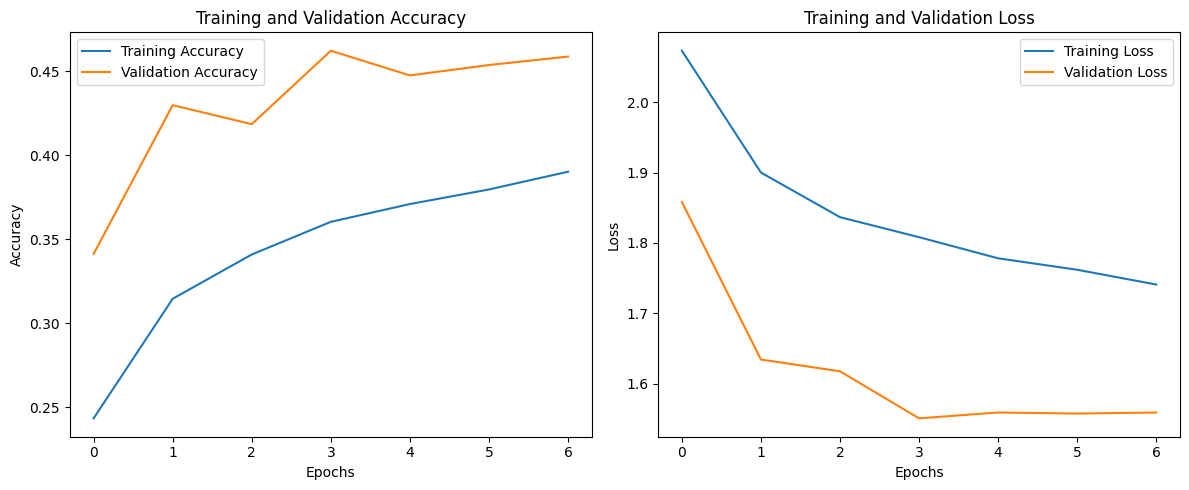

In [2]:
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(trainimage, trainlabel), (testimage, testlabel) = datasets.cifar10.load_data()

# Normalize images to the range [0, 1]
trainimage, testimage = trainimage / 255.0, testimage / 255.0


# Define the model
model = models.Sequential()

# Add data augmentation to generate new training samples from the original dataset
datagen = ImageDataGenerator(
    rotation_range=40,    # Increase range of random rotations
    width_shift_range=0.3,  # Randomly shift the width of images
    height_shift_range=0.3, # Randomly shift the height of images
    shear_range=0.3,       # Randomly shear the images
    zoom_range=0.3,        # Random zoom
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'    # Fill the pixels after transformation
)

datagen.fit(trainimage)

# Add convolutional layers with L2 regularization and dropout
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.4))  # Dropout to prevent overfitting

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.5))  # Increase dropout rate

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))  # Dropout after last convolution layer

# Flatten the output and add a fully connected (dense) layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# Output layer for 10 classes (CIFAR-10 has 10 categories)
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with Adam optimizer and sparse categorical crossentropy loss function
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Callbacks: Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# Train the model with the augmented data
history = model.fit(datagen.flow(trainimage, trainlabel, batch_size=64),
                    epochs=20, 
                    validation_data=(testimage, testlabel),
                    callbacks=[early_stopping])

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [3]:
cname = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
import numpy as np
for i in range(10):
    v=model.predict(testimage)
    print(np.argmax(v[i]))
    print(testlabel[i])


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
3
[3]
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
1
[8]
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
8
[8]
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
8
[0]
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
6
[6]
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
6
[6]
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
1
[1]
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
6
[6]
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
3
[3]
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
1
[1]


(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
[[6.1337018e-01 1.7034354e-02 1.2820889e-02 1.8320384e-03 1.3022789e-02
  1.0121142e-03 5.0627970e-04 3.1932308e-03 3.2296225e-01 1.4245961e-02]]
[[0.1635364  0.09008014 0.08970139 0.08872107 0.0897195  0.08864836
  0.08860353 0.08884192 0.12231844 0.08982931]]
airplane


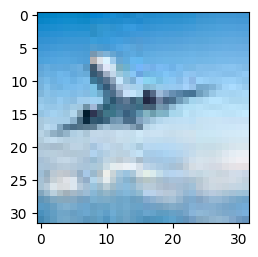

In [16]:
from PIL import Image
import numpy as np

# Set the path to the image in your Downloads folder
image_path = r'C:\Users\asus\Downloads\images_imresizer.jpg'

# Open the image using Pillow
img = Image.open(image_path)

img = img.convert("RGB")
# Resize the image to 32*32 pixels
img_resized = img.resize((32, 32))

# Convert the resized grayscale image to a numpy array
img_array = np.array(img_resized)

# Normalize the image to the range [0, 1] (common practice for machine learning)
img_array = img_array / 255.0

# Add the batch dimension to make the shape (1, 32, 32)
img_array = np.expand_dims(img_array, 0)  # Shape becomes (1, 32, 32)

# Print the shape of the image array
print(img_array.shape)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img_array[0])


predictions_single = model.predict(img_array)
print(predictions_single)
probabilities = tf.nn.softmax(predictions_single).numpy()

print(probabilities)
print(cname[np.argmax(probabilities)])

(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[[0.00315187 0.0017603  0.0535299  0.28428978 0.08157428 0.33634692
  0.12844376 0.10438207 0.00166427 0.00485686]]
dog


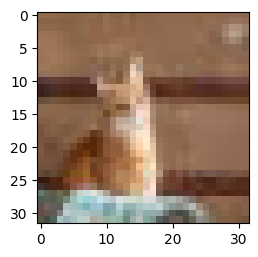

In [5]:
from PIL import Image
import numpy as np

# Set the path to the image in your Downloads folder
image_path = r'C:\Users\asus\Downloads\download_imresizer.jpg'

# Open the image using Pillow
img = Image.open(image_path)

img = img.convert("RGB")
# Resize the image to 32*32 pixels
img_resized = img.resize((32, 32))

# Convert the resized grayscale image to a numpy array
img_array = np.array(img_resized)

# Normalize the image to the range [0, 1] (common practice for machine learning)
img_array = img_array / 255.0

# Add the batch dimension to make the shape (1, 32, 32)
img_array = np.expand_dims(img_array, 0)  # Shape becomes (1, 32, 32)

# Print the shape of the image array
print(img_array.shape)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img_array[0])


predictions_single = model.predict(img_array)

print(predictions_single)
print(cname[np.argmax(predictions_single)])

(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
[[0.01502986 0.02299897 0.08534448 0.01752926 0.27598095 0.04468002
  0.18604769 0.31397492 0.0014394  0.03697445]]
horse


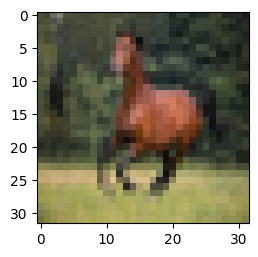

In [ ]:
from PIL import Image
import numpy as np

# Set the path to the image in your Downloads folder
image_path = r'C:\Users\asus\Downloads\horse.jfif'

# Open the image using Pillow
img = Image.open(image_path)

img = img.convert("RGB")

# Resize the image to 32*32 pixels

img_resized = img.resize((32, 32))

#img.rotate(45)
#img.save("hi.jpg")

# Convert the resized grayscale image to a numpy array
img_array = np.array(img_resized)

# Normalize the image to the range [0, 1] (common practice for machine learning)
img_array = img_array / 255.0

# Add the batch dimension to make the shape (1, 32, 32)
img_array = np.expand_dims(img_array, 0)  # Shape becomes (1, 32, 32)

# Print the shape of the image array
print(img_array.shape)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img_array[0])


predictions_single = model.predict(img_array)

print(predictions_single)
print(cname[np.argmax(predictions_single)])

(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[[0.0182987  0.1559375  0.05600851 0.05521109 0.07512885 0.06238799
  0.44726676 0.03735646 0.01188604 0.08051816]]
frog


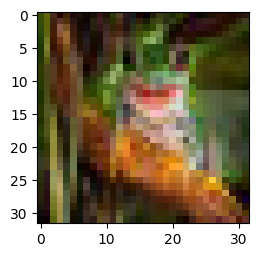

In [7]:
from PIL import Image
import numpy as np

# Set the path to the image in your Downloads folder
image_path = r'C:\Users\asus\Downloads\frog_imresizer.jpg'

# Open the image using Pillow
img = Image.open(image_path)

img = img.convert("RGB")
# Resize the image to 32*32 pixels
img_resized = img.resize((32, 32))

# Convert the resized grayscale image to a numpy array
img_array = np.array(img_resized)

# Normalize the image to the range [0, 1] (common practice for machine learning)
img_array = img_array / 255.0

# Add the batch dimension to make the shape (1, 32, 32)
img_array = np.expand_dims(img_array, 0)  # Shape becomes (1, 32, 32)

# Print the shape of the image array
print(img_array.shape)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img_array[0])


predictions_single = model.predict(img_array)

print(predictions_single)
print(cname[np.argmax(predictions_single)])